In [1]:
import pandas as pd

In [2]:
masking = pd.read_csv('/home/anopsy/Code/hackher/data/masking.csv')
anxiety = pd.read_csv('/home/anopsy/Code/hackher/data/anxiety.csv')
depression = pd.read_csv('/home/anopsy/Code/hackher/data/depression.csv')
control = pd.read_csv('/home/anopsy/Code/hackher/data/control.csv')

In [3]:
masking.shape

(3230, 1)

In [4]:
anxiety.shape

(2636, 1)

In [5]:
depression.shape

(2236, 1)

In [6]:
control.shape

(2685, 1)

In [7]:
masking.shape

(3230, 1)

In [8]:
anxiety.shape

(2636, 1)

In [9]:
depression.shape

(2236, 1)

In [10]:
control.shape

(2685, 1)

In [11]:
masking["diagnosis"] = "masking"
    

In [12]:
anxiety["diagnosis"] = "anxiety"
depression["diagnosis"] = "depression"
control["diagnosis"] = "control"

In [13]:
masking.columns

Index(['Comment', 'diagnosis'], dtype='object')

In [14]:
control.head

<bound method NDFrame.head of                                                 Comment diagnosis
0     Please do not comment directly to this post un...   control
1     1. sleep just a little bit more than you think...   control
2     **20/40/60 rule**\n\nWhen you're 20, you care ...   control
3       Listening is much more important than speaking.   control
4     You can't save someone who isn't actively tryi...   control
...                                                 ...       ...
2680                       Weird attracts weird bro ✌️👽   control
2681                         Get back out there brother   control
2682                             Nope, it’s from a book   control
2683  You gotta do it! I can’t describe the feeling ...   control
2684                                                how   control

[2685 rows x 2 columns]>

In [15]:
masking['Comment'] = masking['Comment'].str.replace('autism', '')
masking['Comment'] = masking['Comment'].str.replace('autistic', '')
masking['Comment'] = masking['Comment'].str.replace('masking', '')
masking['Comment'] = masking['Comment'].str.replace('spectrum', '')


In [16]:
anxiety['Comment'] = anxiety['Comment'].str.replace('anxiety', '')
anxiety['Comment'] = anxiety['Comment'].str.replace('anxious', '')


In [17]:
depression['Comment'] = depression['Comment'].str.replace('depression', '')
depression['Comment'] = depression['Comment'].str.replace('depressed', '')

In [18]:
df = pd.concat([masking, anxiety, depression, control], axis=0, ignore_index=True)

In [19]:
df.head

<bound method NDFrame.head of                                                  Comment diagnosis
0      Essentially it is  your  traits in order to fi...   masking
1      Autistic people behave in certain ways that ar...   masking
2      Neurotypical people tend to be uncomfortable a...   masking
3      You know how you put a high-powered graphics c...   masking
4      Basically it's when someone who is  suppresses...   masking
...                                                  ...       ...
10782                       Weird attracts weird bro ✌️👽   control
10783                         Get back out there brother   control
10784                             Nope, it’s from a book   control
10785  You gotta do it! I can’t describe the feeling ...   control
10786                                                how   control

[10787 rows x 2 columns]>

In [20]:
df.columns

Index(['Comment', 'diagnosis'], dtype='object')

In [21]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [23]:
# Download the NLTK stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/anopsy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Download the NLTK lemmatizer dictionary
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/anopsy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

In [26]:

# Define a function to preprocess text
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert all words to lower case
    text = text.lower()
    
    # Split the text into words
    words = text.split()
    
    # Remove stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    text = ' '.join(words)
    
    return text


In [27]:
# Apply the preprocessing function to the 'text' column
df['Comment'] = df['Comment'].apply(preprocess_text)

In [28]:
df.head

<bound method NDFrame.head of                                                  Comment diagnosis
0      essentially trait order fit prevalent older pe...   masking
1      autistic people behave certain way obvious non...   masking
2      neurotypical people tend uncomfortable around ...   masking
3      know put high powered graphic card computer pl...   masking
4      basically someone suppresses trait always poss...   masking
...                                                  ...       ...
10782                           weird attracts weird bro   control
10783                                   get back brother   control
10784                                          nope book   control
10785  gotta describe feeling hear drum stick hit dru...   control
10786                                                      control

[10787 rows x 2 columns]>

In [29]:
# Remove rows where the 'Comment' column has fewer than 6 words
df = df[df['Comment'].str.split().str.len() >= 6]

In [30]:
df['len'] = df['Comment'].str.split().str.len()

/tmp/ipykernel_24985/2348831484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len'] = df['Comment'].str.split().str.len()


In [31]:
df.head

<bound method NDFrame.head of                                                  Comment diagnosis  len
0      essentially trait order fit prevalent older pe...   masking   72
1      autistic people behave certain way obvious non...   masking   96
2      neurotypical people tend uncomfortable around ...   masking   17
3      know put high powered graphic card computer pl...   masking   88
4      basically someone suppresses trait always poss...   masking   16
...                                                  ...       ...  ...
10773  fuck yeah need meet people like used weird wil...   control   24
10776  still kicking seen idea amazing sign year much...   control   14
10780  thank actually sound like something try absolu...   control   13
10781  athletic competitive person activity find phys...   control  102
10785  gotta describe feeling hear drum stick hit dru...   control   14

[7884 rows x 3 columns]>

<Axes: ylabel='Frequency'>

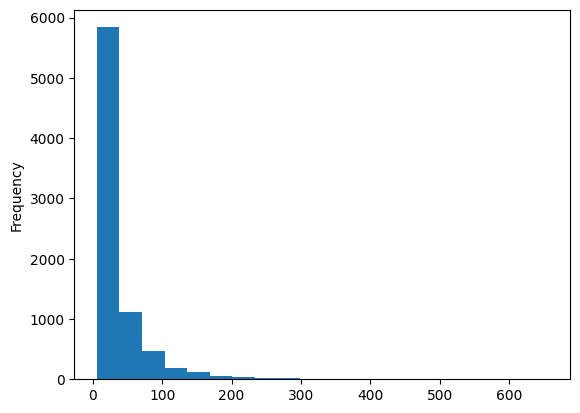

In [32]:
df['len'].plot.hist(bins=20)


In [33]:
df = df[df['Comment'].str.split().str.len() <= 200]

In [34]:
df.shape

(7789, 3)

In [35]:
%pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN

In [37]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


In [38]:
# Split the text in each row into a list of words
df['list'] = df['Comment'].apply(lambda x: x.split())

# Convert the 'Comments' column to a list of lists
comments_list = df['list'].tolist()

/tmp/ipykernel_24985/1031983299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list'] = df['Comment'].apply(lambda x: x.split())


In [39]:
df['list']

0        [essentially, trait, order, fit, prevalent, ol...
1        [autistic, people, behave, certain, way, obvio...
2        [neurotypical, people, tend, uncomfortable, ar...
3        [know, put, high, powered, graphic, card, comp...
4        [basically, someone, suppresses, trait, always...
                               ...                        
10773    [fuck, yeah, need, meet, people, like, used, w...
10776    [still, kicking, seen, idea, amazing, sign, ye...
10780    [thank, actually, sound, like, something, try,...
10781    [athletic, competitive, person, activity, find...
10785    [gotta, describe, feeling, hear, drum, stick, ...
Name: list, Length: 7789, dtype: object

In [40]:
# Train a Word2Vec model
model = Word2Vec(comments_list, vector_size=100, window=5, min_count=1, workers=4)
model.train(comments_list, total_examples=len(comments_list), epochs=10)

(2259277, 2458420)

In [41]:
# Use the Word2Vec model to get vector representations of your sentences
# This example just averages the word vectors for each sentence
X = [model.wv[comment].mean(axis=0) for comment in comments_list]

In [42]:
# Assume 'labels' is a list of labels corresponding to each sentence
y = df['diagnosis'].tolist()

In [43]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Train a LinearSVC model
classifier = LinearSVC()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [45]:
# Evaluate the model
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anxiety       0.67      0.58      0.62       397
     control       0.58      0.62      0.60       324
  depression       0.59      0.51      0.55       328
     masking       0.64      0.74      0.69       509

    accuracy                           0.62      1558
   macro avg       0.62      0.61      0.61      1558
weighted avg       0.62      0.62      0.62      1558



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# Extract features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Comment'])

In [48]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['diagnosis'], test_size=0.2, random_state=66)

In [49]:
# Train model
model = LinearSVC()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [50]:
# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anxiety       0.73      0.72      0.73       381
     control       0.71      0.68      0.69       343
  depression       0.77      0.71      0.74       352
     masking       0.73      0.81      0.77       482

    accuracy                           0.74      1558
   macro avg       0.74      0.73      0.73      1558
weighted avg       0.74      0.74      0.74      1558



In [51]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
%pip install keras-preprocessing

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]

corpus = flatten_comprehension(comments_list)
tokenizer = CountVectorizer()
tokenizer.fit_transform(corpus)

# The size of the vocabulary is the maximum integer index + 1
vocab_size = len(tokenizer.get_feature_names_out()) + 1
print(vocab_size)


14368


In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
ohe = OneHotEncoder()

In [63]:
y = ohe.fit_transform(df[['diagnosis']])


In [66]:
X = vectorizer.fit_transform(df['Comment'])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Define your model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))

# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5


TypeError: Failed to convert elements of SparseTensor(indices=Tensor("data_3:0", shape=(None, 2), dtype=int64), values=Tensor("data_4:0", shape=(None,), dtype=float32), dense_shape=Tensor("data_5:0", shape=(2,), dtype=int64)) to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.